## xcube Data Store Framework - Sentinel Hub

This notebook provides a walk-through demonstrating how to use xcube and the xcube Sentinel Hub (SH) plugin to read and explore data from the [Sentinel Hub cloud API](https://www.sentinel-hub.com/).

**Please note:**
In order to access data from Sentinel Hub, you need Sentinel Hub API credentials. They may be passed as store parameters (see further below) or exported from environment variables.  
In case you have not exported them already, you _may_ also set them by uncommenting the cell below and adjusting the content to your access credentials. However, we do not recommend this method!

**Within DeepESDL there is the possiblity to apply for SentinelHub access - please contact the DeepESDL team :)**
Brockmann Consult, 2024

-----------------

**This notebook runs with the python environment `deepesdl-xcube-1.3.1`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

This notebook  gives an introduction to the xcube-sentinelhub store and additionally shows how to access different data sets through the Sentinel Hub API via xcube:

1. Access Sentinel-1 through xcube Sentinel hub Store
2. Access Sentinel-2 through xcube Sentinel hub Store
3. Access Sentinel-5P through xcube Sentinel hub Store
4. Access Sentinel-3 SLSTR through xcube Sentinel hub Store
5. Access Sentinel-3 OLCI through xcube Sentinel hub Store

In [1]:
# import os
# os.environ["SH_CLIENT_ID"] =  your_sh_client_id
# os.environ["SH_CLIENT_SECRET"] = your_sh_client_secret

In [2]:
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt

Configure matplotlib to display graphs inline directly in the notebook and set a sensible default figure size.

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16,12

Check whether the `sentinelhub` store is among the available stores, if not you need to choose an environment where xcube-sh is included. 

In [4]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available for the `sentinelhub` store? 

In [5]:
get_data_store_params_schema('sentinelhub')

Please note the `client_id` and `client_secret` parameters mentioned at the beginning.

Provide mandatory parameters to instantiate the store class:

In [6]:
store = new_data_store('sentinelhub', num_retries=400)

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [7]:
list(store.get_data_ids())

['S2L1C', 'S1GRD', 'S2L2A', 'DEM']

Get more info about a specific dataset. This includes a description of the possible open formats:

In [8]:
store.describe_data('S2L2A')

Which parameters must be passsed or are available to open the dataset? 

In [9]:
store.get_open_data_params_schema('S2L2A')

There are 3 required parameters, so we need to provide them to open a dataset, one of them being bbox. Let's set a region covering Hamburg:

In [10]:
bbox=[9.7, 53.4, 10.2, 53.7]

Take a look at the bbox in order to make sure the area is correctly set: 

In [11]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

Now set the other parameters for opening the dataset from the store: 

In [12]:
dataset = store.open_data('S2L2A', 
                          variable_names=['B04'], 
                          bbox=bbox, 
                          spatial_res=0.00018, 
                          time_range=('2020-08-10','2020-08-20'), 
                          time_period='1D',
                          tile_size= [1024, 1024])
dataset

<xarray.Dataset>
Dimensions:    (time: 11, lat: 2048, lon: 3072, bnds: 2)
Coordinates:
  * lat        (lat) float64 53.77 53.77 53.77 53.77 ... 53.4 53.4 53.4 53.4
  * lon        (lon) float64 9.7 9.7 9.7 9.701 9.701 ... 10.25 10.25 10.25 10.25
  * time       (time) datetime64[ns] 2020-08-10T12:00:00 ... 2020-08-20T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    title:                     S2L2A Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-02-27T11:46:06.822452
    time_coverage_start:       2020-08-10T00:00:00+00:00
    time_coverage_end:         2020-08-21T00:00:00+00:00
    ...                        ...
    time_coverage_resolution:  P1DT0H0M0S
    geospatial_lon_min:        9.7
    geospatial_lat_min:        53.4
    geospatial_lon_max:        10.25296
    geospatial_lat_max:        53.76864
    processing_level:          L2A

For further information, a description about the dataset and the bands may be found here: https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/ .

Plot one time stamp of the dataset for our requested variable: 

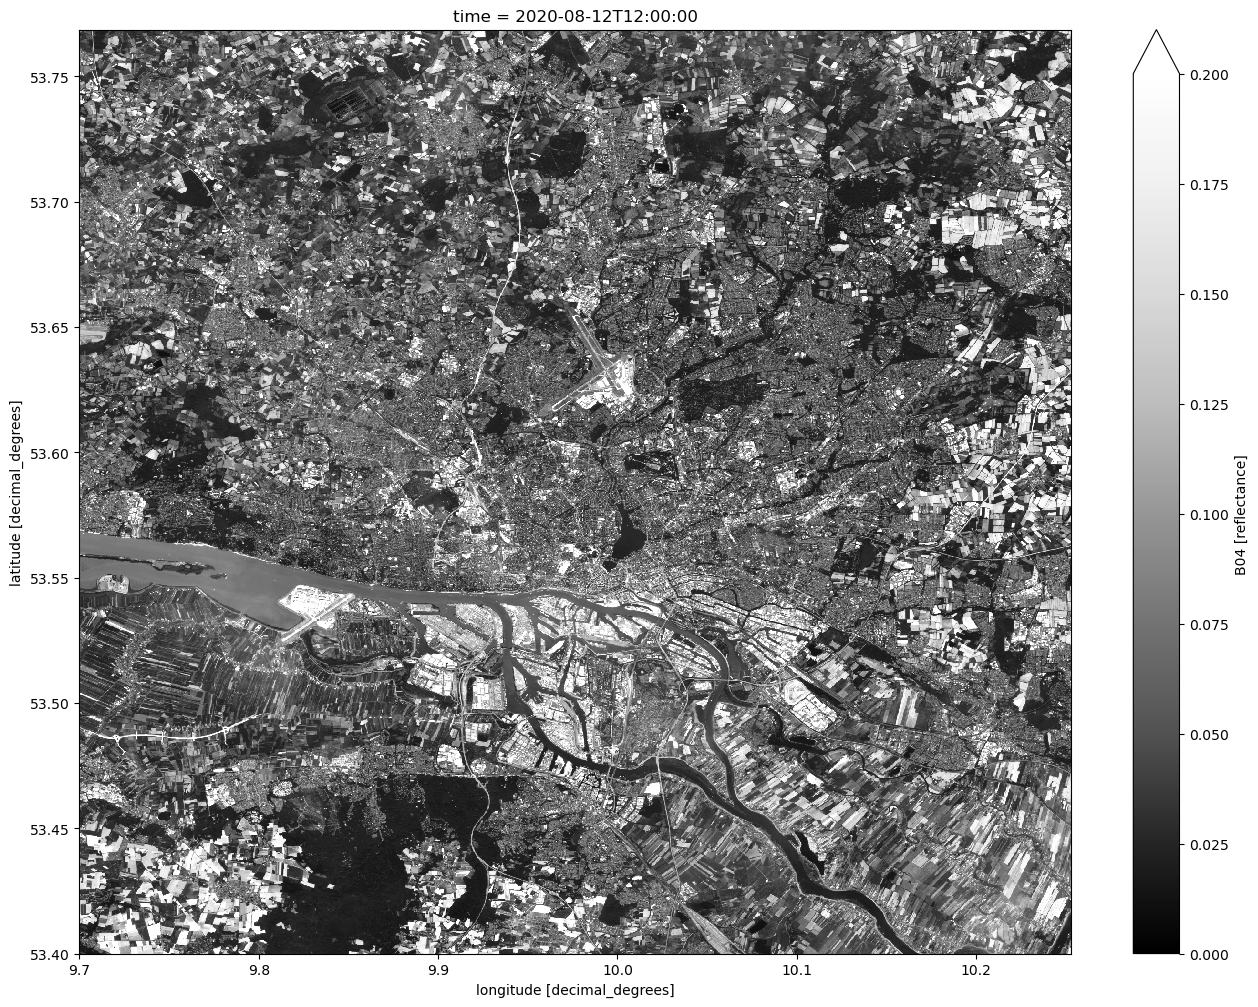

In [13]:
dataset.B04.isel(time=2).plot.imshow(vmin=0, vmax=0.2, cmap='Greys_r')

In case you wonder why we chose Hamburg - well, it is a lovely city! 

### Let's have a look at the different products, which are available via xcube-sentinelhub.

## 1. Sentinel-1 GRD

Setting of AOI bounding box

In [14]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 11.00  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [15]:
spatial_res = 0.00018   # = 20.038 meters in degree

Sentinel Hub currently supported Sentinel-1 GRD (Ground Range Detected) products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-1-GRD)

In [16]:
store = new_data_store('sentinelhub', num_retries=400)

In [17]:
list(store.get_data_ids())

['S2L1C', 'S1GRD', 'S2L2A', 'DEM']

In [18]:
store.describe_data('S1GRD')

In [19]:
cube = store.open_data(
    'S1GRD',
    variable_names=['VH'],
    tile_size=[512, 512],
    crs = "EPSG:4326",
    spatial_res = spatial_res,
    bbox=bbox,
    time_range=['2019-06-14', '2019-07-31'],
    time_period='2D'
)
cube

<xarray.Dataset>
Dimensions:    (time: 24, lat: 2048, lon: 5632, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2019-06-15 2019-06-17 ... 2019-07-31
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(24, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH         (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-02-27T11:46:10.227127
    time_coverage_start:       2019-06-14T00:00:00+00:00
    time_coverage_end:         2019-08-01T00:00:00+00:00
    ...                        ...
    time_coverage_resolution:  P2DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.01376
    geospatial_lat_max:        54.63864
    processing_level:          L1B

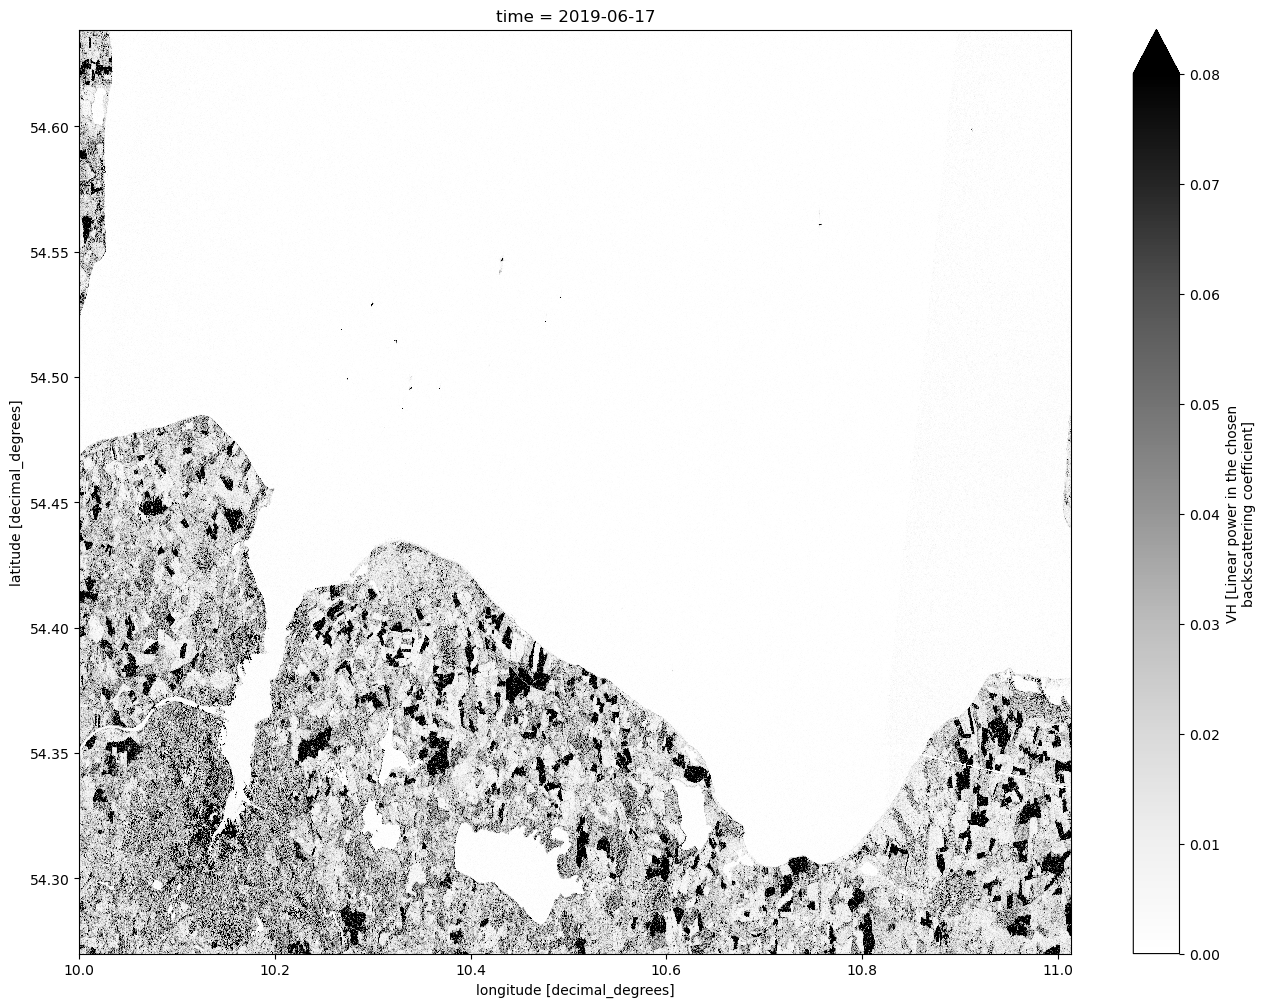

In [20]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

## 2. Sentinel-2 L2A (SCL)

Sentinel Hub currently supported Sentinel-2 products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-2-L2A)

In [21]:
store.describe_data('S2L2A')

In [36]:
cube = store.open_data(
    'S2L2A',
    variable_names=['SCL'],
    tile_size=[512, 512],
    spatial_res = spatial_res,
    bbox=bbox,
    time_range=['2018-06-14', '2018-07-31'],
    time_tolerance='30m'
)
cube

<xarray.Dataset>
Dimensions:    (time: 28, lat: 2048, lon: 5632, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2018-06-14T10:30:21 ... 2018-07-29T10:30:19
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(28, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2024-02-27T11:49:52.397790
    time_coverage_start:     2018-06-14T10:30:21+00:00
    time_coverage_end:       2018-07-29T10:30:19+00:00
    time_coverage_duration:  P44DT23H59M58S
    geospatial_lon_min:      10.0
    geospatial_lat_min:      54.27
    geospatial_lon_max:      11.01376
    geospatial_lat_max:      54.63864
    processing_level:        L2A

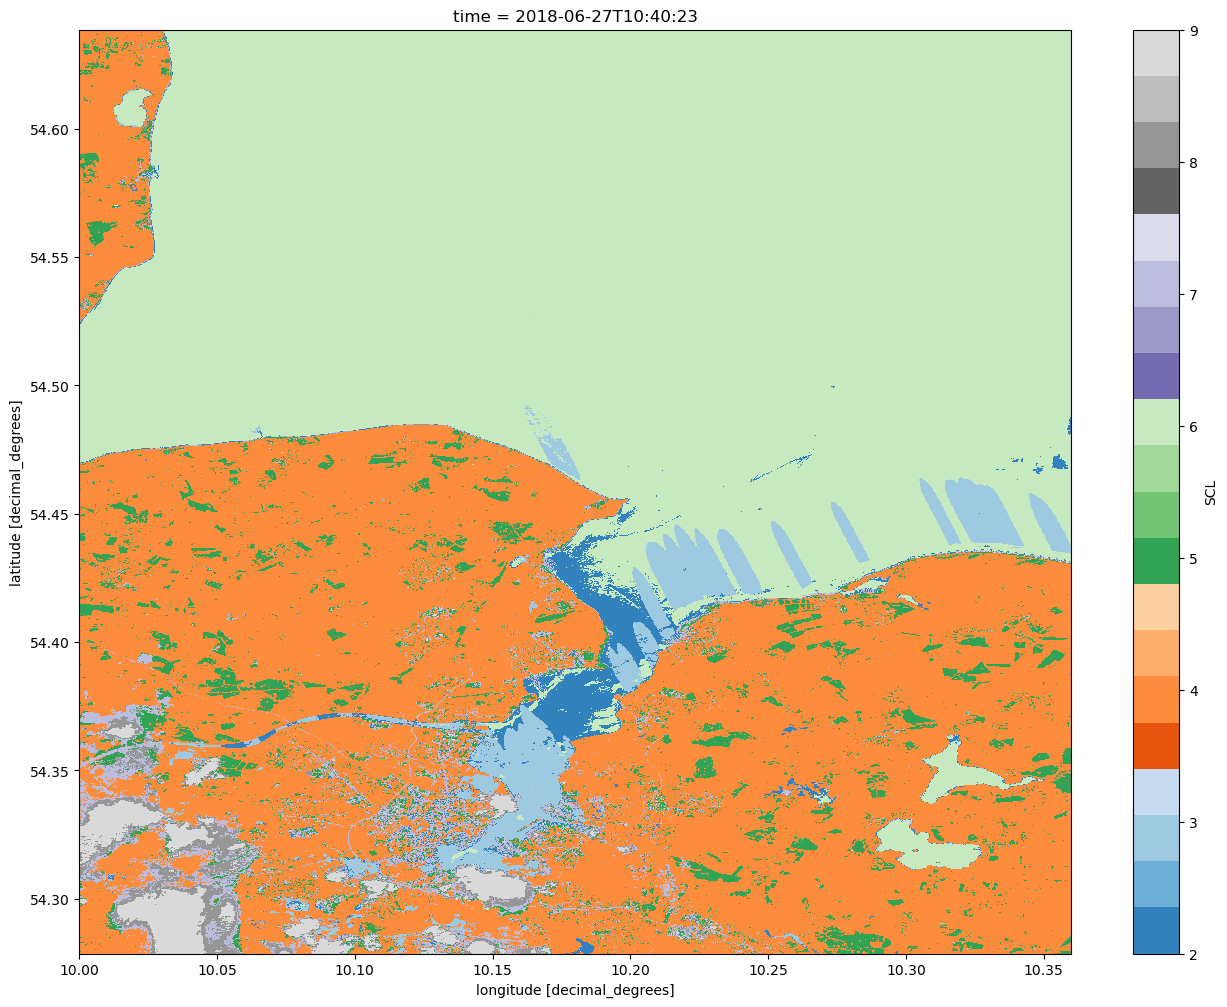

In [43]:
cube.SCL.isel(time=8, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='tab20c')

## 3. Sentinel-5P L2

Sentinel Hub currently supported Sentinel-5P products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-5P-L2).
To access Sentinel-5P or Sentinel-3 data, another api endpoint is required. You can learn about the endpoints [here](https://docs.sentinel-hub.com/api/latest/data/). `services.sentinel-hub.com` is the default.

In [24]:
store = new_data_store('sentinelhub', api_url='https://creodias.sentinel-hub.com', num_retries=400)

In [25]:
list(store.get_data_ids())

['S2L1C', 'S3OLCI', 'S3SLSTR', 'S1GRD', 'S2L2A', 'S5PL2']

In [26]:
store.describe_data('S5PL2')

In [27]:
cube = store.open_data(
    'S5PL2',
    variable_names=['NO2'],
    tile_size=[512, 512],
    bbox=bbox,
    spatial_res=(bbox[2]-bbox[0])/512,
    upsampling='BILINEAR',
    time_range=['2018-06-14', '2018-07-31'],
    time_period='3D'
)
cube

<xarray.Dataset>
Dimensions:    (time: 16, lat: 169, lon: 512, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.6 54.6 54.6 54.59 ... 54.28 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.01 10.01 ... 10.99 11.0 11.0 11.0
  * time       (time) datetime64[ns] 2018-06-15T12:00:00 ... 2018-07-30T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(16, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    NO2        (time, lat, lon) float32 dask.array<chunksize=(1, 169, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-02-27T11:46:20.517876
    time_coverage_start:       2018-06-14T00:00:00+00:00
    time_coverage_end:         2018-08-01T00:00:00+00:00
    time_coverage_duration:    P48DT0H0M0S
    time_coverage_resolution:  P3DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.0
    geospatial_lat_max:        54.600078125

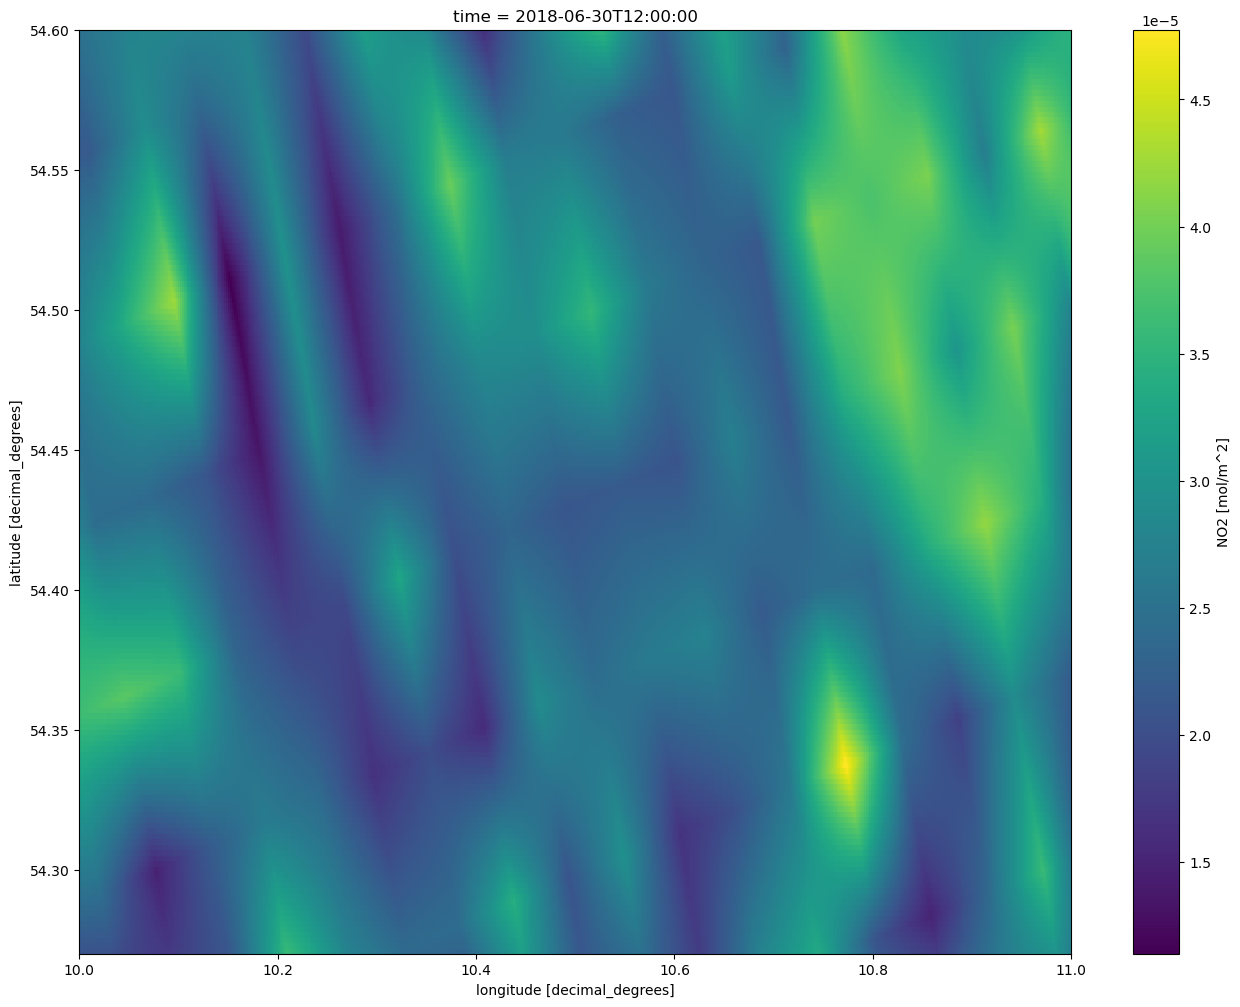

In [28]:
cube.NO2.isel(time=5).plot.imshow()

## 4. Sentinel-3 SLSTR

Sentinel Hub currently supported Sentinel-3 SLSTR products: [here](https://docs.sentinel-hub.com/api/latest/data/sentinel-3-slstr-l1b).

In [29]:
store.describe_data('S3SLSTR')

In [30]:
cube = store.open_data(
    'S3SLSTR',
    variable_names=['F1'],
    tile_size=[512, 512],
    bbox=bbox,
    spatial_res=(bbox[2]-bbox[0])/512,
    time_range=['2018-06-14', '2018-07-31'],
    time_period='3D'
)
cube

<xarray.Dataset>
Dimensions:    (time: 16, lat: 169, lon: 512, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.6 54.6 54.6 54.59 ... 54.28 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.01 10.01 ... 10.99 11.0 11.0 11.0
  * time       (time) datetime64[ns] 2018-06-15T12:00:00 ... 2018-07-30T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(16, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    F1         (time, lat, lon) float32 dask.array<chunksize=(1, 169, 512), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    title:                     S3SLSTR Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-02-27T11:46:22.741767
    time_coverage_start:       2018-06-14T00:00:00+00:00
    time_coverage_end:         2018-08-01T00:00:00+00:00
    ...                        ...
    time_coverage_resolution:  P3DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.0
    geospatial_lat_max:        54.600078125
    processing_level:          L1B

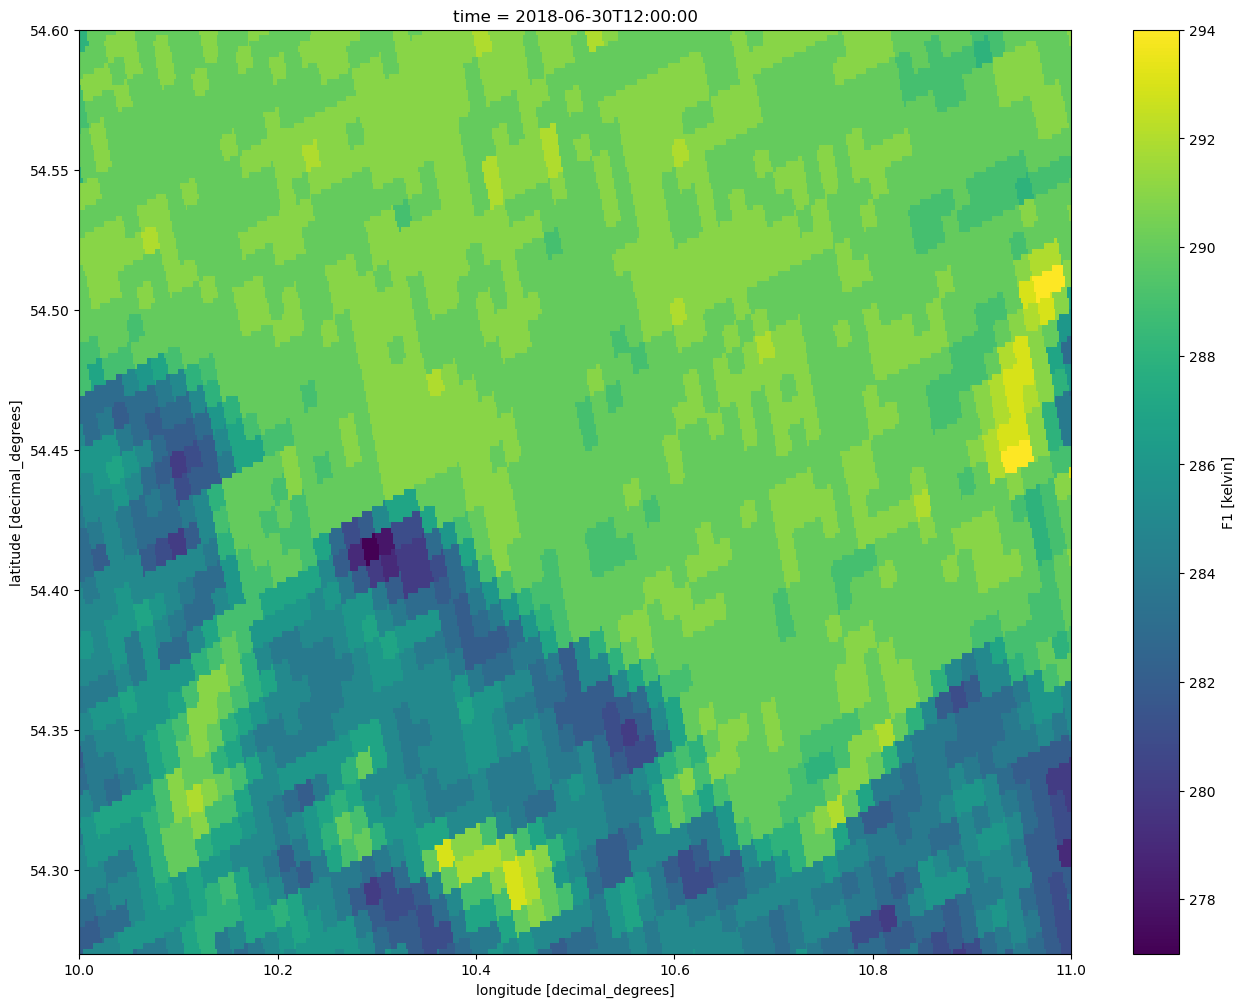

In [31]:
cube.F1.isel(time=5).plot.imshow()

## 5. Sentinel-3 OLCI

Sentinel Hub currently supported Sentinel-3 OLCI products: [here](https://docs.sentinel-hub.com/api/latest/data/sentinel-3-olci-l1b/)

In [32]:
store.describe_data('S3OLCI')

In [33]:
cube = store.open_data(
    'S3OLCI',
    variable_names=['B04'],
    tile_size=[512, 512],
    bbox=bbox,
    spatial_res=(bbox[2]-bbox[0])/512,
    time_range=['2018-06-14', '2018-07-31'],
    time_period='3D'
)
cube

<xarray.Dataset>
Dimensions:    (time: 16, lat: 169, lon: 512, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.6 54.6 54.6 54.59 ... 54.28 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.01 10.01 ... 10.99 11.0 11.0 11.0
  * time       (time) datetime64[ns] 2018-06-15T12:00:00 ... 2018-07-30T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(16, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 169, 512), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    title:                     S3OLCI Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-02-27T11:46:23.621050
    time_coverage_start:       2018-06-14T00:00:00+00:00
    time_coverage_end:         2018-08-01T00:00:00+00:00
    ...                        ...
    time_coverage_resolution:  P3DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.0
    geospatial_lat_max:        54.600078125
    processing_level:          L1B

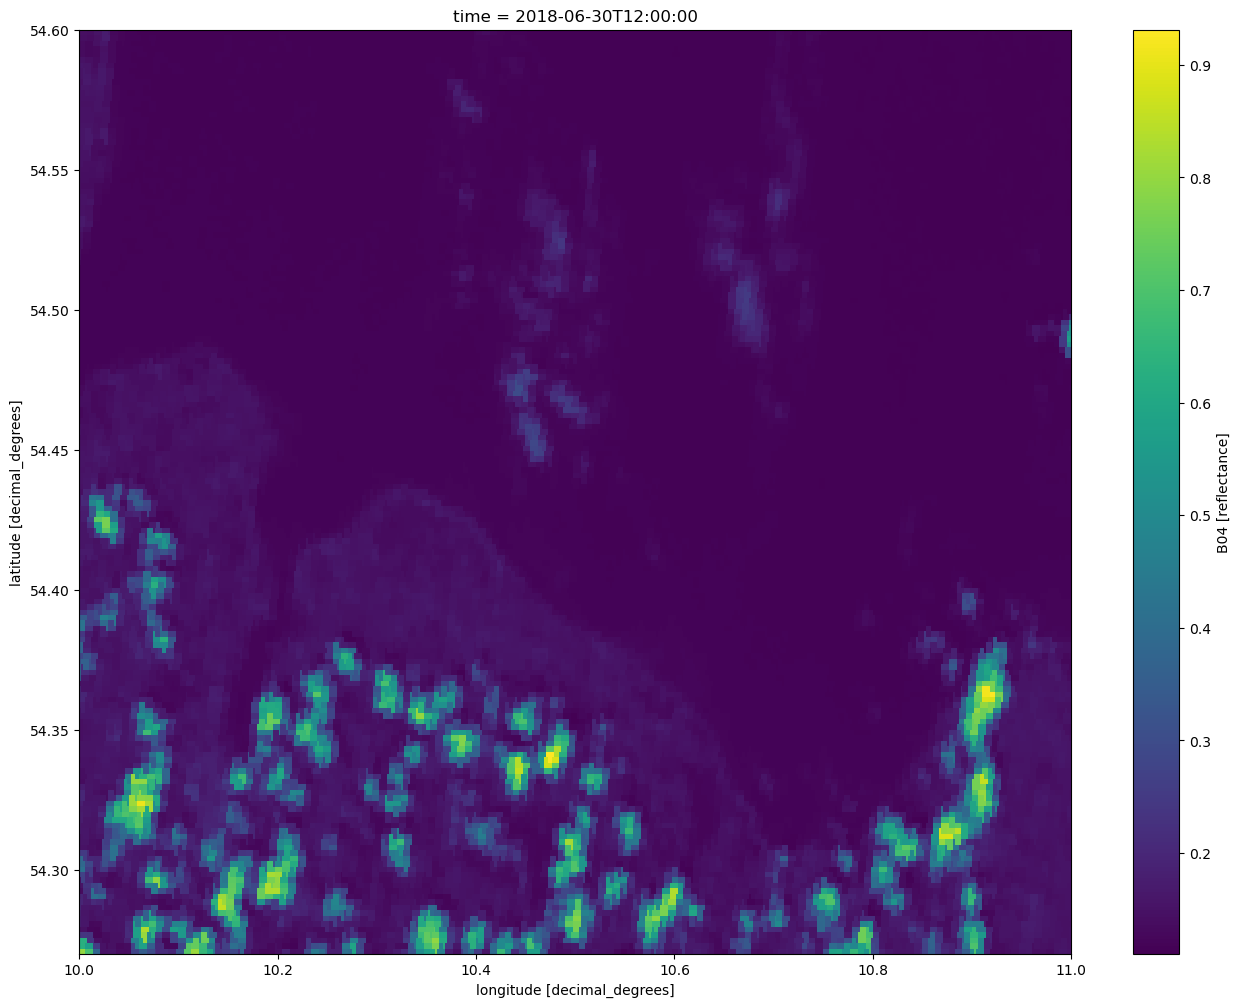

In [34]:
cube.B04.isel(time=5).plot.imshow()